# Policy Values

Policy value at time $t$ is the present value, at time $t$, of the future loss random variable

__Net future loss at issue__

For net future loss, we consider benefit payments and net premiums only.

$_0L = b~v^{K_x + 1} - P\ddot{a}_{\overline{K_x + 1|}} = (b + \dfrac{P}{d})~v^{K_x+1} - \dfrac{P}{d}$
- net future loss at issue of fully discrete whole life insurance

$_0L = b~v^{T_x} - P\overline{a}_{\overline{T_x|}} = (b + \dfrac{P}{\delta})~v^{T_x} - \dfrac{P}{\delta}$ (continuous)
- net future loss at issue of fully continuous whole life insurance

__Gross future loss at issue__

For gross future loss, expenses are included along with benefits payments and gross premiums.

$_0L = (b + E + \dfrac{G - e_r}{d})~v^{K_x+1} - \dfrac{G - e_r}{d} + (e_i - e_r)$
- gross future loss at issue of fully discrete whole life insurance



## Net policy value

The amount needed at time $t$ to cover the shortfall of expected future benefits greater than the EPV of future premiums is called the policy value for the policy at time $t$, denoted $_tV$,

$_tV = E[_tL] = EPV_t (\textsf{future benefits}) - EPV_t (\textsf{future premiums})$

- net policy value at time $t$ is the expected net future loss of benefits less premiums after time $t$

$_0V = 0$ 
- net policy value at issue is 0 because of the equivalence principle

$_nV = 0$ 
- net policy value at year $n$ is 0 for a n-year term insurance

$_nV = $ endowment benefit
- net policy value at year $n$ is equal to the endowment benefit for a n-year endowment insurance

__Shortcuts for whole life and endowment insurance:__ 

$_tV = b[1 - \dfrac{\ddot{a}_{x+t}}{\ddot{a}_{x}}]$ or $b[\dfrac{A_{x+t} - A_x}{1 - A_x}]\space $
- net policy value at time $t$ of fully-discrete whole life insurance*

 
$_tV = b[1 - \dfrac{\overline{a}_{x+t}}{\overline{a}_{x}}]$ or $b[\dfrac{\overline{A}_{x+t} - \overline{A}_x}{1 - \overline{A}_x}] \space $
- net policy value at time $t$ of fully-continuous whole life insurance*

*Add $:\overline{n|}$ to $A$'s and $a$'s for endowment insurance

## Gross policy value

Gross premium policy values explicitly allow for expenses and for the full gross premium, whereas net premium policy values exclude expenses from cash flows, and only the net premium is counted.


$_tV^g = E[_tL^g] = EPV_t (\textsf{future benefits}) + EPV_t (\textsf{future expenses}) - EPV_t (\textsf{future premiums})$

- gross policy value at time $t$ is the expected net future loss of benefits and expenses less premiums after time $t$

## Variance of future loss

These formulas apply to _whole life_ and _endowment insurance_ __only__:

__Net future loss__

$Var[_tL] = (b + \dfrac{P}{d})^2~[^{2}A_{x+t:\overline{n-t|}} - (A_{x+t:\overline{n-t|}})^2]$
- fully discrete endowment insurance*
  
$Var[_tL] = (b + \dfrac{P}{\delta})^2~[^{2}\overline{A}_{x+t:\overline{n-t|}} - (\overline{A}_{x+t:\overline{n-t|}})^2]$

- fully continuous endowment insurance*

__Gross future loss__

$Var[_tL] = (b + E + \dfrac{G-e_r}{d})^2~[^{2}A_{x+t:\overline{n-t|}} - (A_{x+t:\overline{n-t|}})^2]$

- fully discrete endowment insurance*
 
__Shortcuts for variance of net future loss__ 

When net premiums are set under equivalence principle, these shortcuts are available without explicitly specifying the value of net premiums, again, for _whole life_ and _endowment insurance_ __only__:

$Var[_tL] = b^2[\dfrac{^{2}A_{x+t:\overline{n-t|}} - (A_{x+t:\overline{n-t|}})^2}{(1 - A_{x:\overline{n|}})^2}]$

- variance of net future loss for fully-discrete endowment insurance*
    
$Var[_tL] = b^2[\dfrac{^{2}\overline{A}_{x+t:\overline{n-t|}} - (\overline{A}_{x+t:\overline{n-t|}})^2}{(1 - \overline{A}_{x:\overline{n|}})^2}]$

- variance of net future loss for fully-continuous endowment insurance*

*For whole life insurance, remove the $\overline{:n|}$ and $\overline{:n-t|}$ notations.

## Expense reserve

$P^e = P^g - P^n$

- expense premium (sometimes, expense loading) is defined as the difference of gross premium and net premium

$_tV^e = ~_tV^g - ~_tV = EPV_t(\textsf{future expenses}) -  EPV_t(\textsf{future expense loadings})$

- expense reserves, defined as the difference between gross reserves and net reserves, equals the expected present value of future expenses less the expected present value of future expense loadings (or expense premiums)

Generally: 
- $_tV^e < 0$
- $~_tV > ~_tV^g > 0 > ~_tV^e$

## Examples

The `PolicyValues` class implements methods for computing net and gross future losses, and policy values (expected present values).  The `Contract` class helps to store and retrieve policy contract terms, such as benefit amounts and various expenses.

In [1]:
from actuarialmath.policyvalues import PolicyValues, Contract


__SOA Question 6.24__

For a fully continuous whole life insurance of 1 on (x), you are given:

- L is the present value of the loss at issue random variable if the premium rate is
determined by the equivalence principle
- L^* is the present value of the loss at issue random variable if the premium rate is 0.06
- $\delta = 0.07$
- $\overline{A}_x = 0.30$
- $Var(L) = 0.18$

Calculate $Var(L^*)$.

In [2]:
print("SOA Question 6.24:  (E) 0.30")
life = PolicyValues().set_interest(delta=0.07)
x, A1 = 0, 0.30   # Policy for first insurance
P = life.premium_equivalence(A=A1, discrete=False)  # Need its premium
contract = Contract(premium=P, discrete=False)
def fun(A2):  # Solve for A2, given Var(Loss)
    return life.gross_variance_loss(A1=A1, A2=A2, contract=contract)
A2 = life.solve(fun, target=0.18, grid=0.18)
contract = Contract(premium=0.06, discrete=False)     # Solve second insurance
variance = life.gross_variance_loss(A1=A1, A2=A2, contract=contract)
print(variance)


SOA Question 6.24:  (E) 0.30
0.30419999999999975


__SOA Question 6.30__

For a fully discrete whole life insurance of 100 on (x), you are given:
- The first year expense is 10% of the gross annual premium
- Expenses in subsequent years are 5% of the gross annual premium
- The gross premium calculated using the equivalence principle is 2.338
- $i = 0.04$
- $\ddot{a}_x = 16.50$
- $^2A_x = 0.17$

Calculate the variance of the loss at issue random variable.

In [3]:
print("SOA Question 6.30:  (A) 900")
life = PolicyValues().set_interest(i=0.04)
contract = Contract(premium=2.338, benefit=100, initial_premium=.1,
                    renewal_premium=0.05)
var = life.gross_variance_loss(A1=life.insurance_twin(16.50),
                                A2=0.17, contract=contract)
print(var)



SOA Question 6.30:  (A) 900
908.141412994607


__SOA Question 7.32__

For two fully continuous whole life insurance policies on (x), you are given:

| | Death Benefit | Annual Premium Rate | Variance of the PV of Future Loss at t |
|---|---|---|---|
| Policy A | 1 | 0.10 | 0.455 |
| Policy B | 2 | 0.16 | - |

- $\delta= 0.06$

Calculate the variance of the present value of future loss at $t$ for Policy B.

In [4]:
print("SOA Question 7.32:  (B) 1.4")
life = PolicyValues().set_interest(i=0.06)
contract = Contract(benefit=1, premium=0.1)
def fun(A2):
    return life.gross_variance_loss(A1=0, A2=A2, contract=contract)
A2 = life.solve(fun, target=0.455, grid=0.455)
contract = Contract(benefit=2, premium=0.16)
var = life.gross_variance_loss(A1=0, A2=A2, contract=contract)
print(var)

SOA Question 7.32:  (B) 1.4
1.3848168384380901


__SOA Question 6.12__

For a fully discrete whole life insurance of 1000 on (x), you are given:
- The following expenses are incurred at the beginning of each year:

| | Year 1 | Years 2+ |
|---|---|---|
| Percent of premium | 75% | 10% |
| Maintenance expenses | 10 | 2 |

- An additional expense of 20 is paid when the death benefit is paid
- The gross premium is determined using the equivalence principle
- $i = 0.06$
- $\ddot{a}_x = 12.0$
- $^2A_x = 0.14$

Calculate the variance of the loss at issue random variable.

In [5]:
print("SOA Question 6.12:  (E) 88900")
life = PolicyValues().set_interest(i=0.06)
a = 12
A = life.insurance_twin(a)
contract = Contract(benefit=1000, settlement_policy=20, 
                    initial_policy=10, initial_premium=0.75, 
                    renewal_policy=2, renewal_premium=0.1)
contract.premium = life.gross_premium(A=A, a=a, **contract.premium_terms)
print(A, contract.premium)
L = life.gross_variance_loss(A1=A, A2=0.14, contract=contract)
print(L)



SOA Question 6.12:  (E) 88900
0.3207547169811321 35.38618830746352
88862.59592874818


__Plot present value of future loss r.v L__:

Assume mortality follows Standard Ultimate Life Table. Indicate breakeven lifetime.

-0.000695265147726408

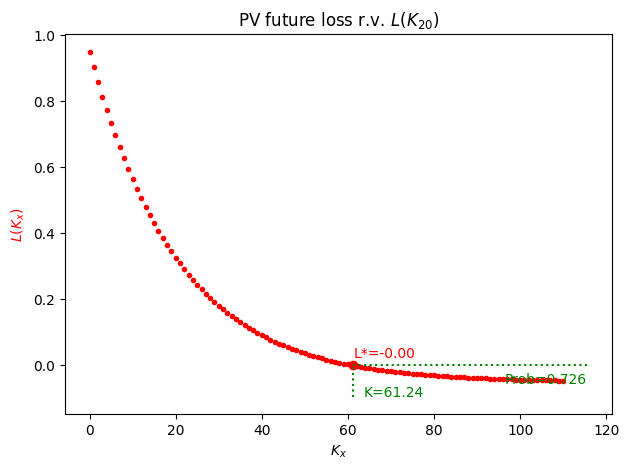

In [6]:
from actuarialmath.sult import SULT
life = SULT()
x = 20
P = life.net_premium(x=x)
contract = Contract(premium=P, discrete=True)
T = life.L_to_t(L=0, contract=contract)  # breakeven T                            
life.L_plot(x=x, T=T, contract=contract)


## Methods

In [7]:
import describe
describe.methods(PolicyValues)



class PolicyValues - Compute net and gross future losses and policy values

    Methods:
    --------

    net_future_loss(A, A1, b):
      Shortcuts for WL or Endowment Insurance net loss

    net_variance_loss(A1, A2, A, b):
      Shortcuts for variance of net loss of WL or Endowment Insurance

    net_policy_variance(x, s, t, b, n, endowment, discrete):
      Variance of future loss for WL or Endowment Ins assuming equivalence

    gross_future_loss(A, a, contract):
      Shortcut for WL or Endowment Insurance gross future loss

    gross_policy_variance(x, s, t, n, contract):
      Variance of gross policy value for WL and Endowment Insurance

    gross_policy_value(x, s, t, n, contract):
      Gross policy values for insurance: t_V = E[L_t]

    L_from_t(t, contract):
      PV of Loss L(t) at time of death t = T_x (or K_x if discrete)

    L_to_t(L, contract):
      Compute time of death T_x s.t. PV future loss is L

    L_from_prob(x, prob, contract):
      Compute PV of future 

In [8]:
import describe
describe.methods(PolicyValues)


class PolicyValues - Compute net and gross future losses and policy values

    Methods:
    --------

    net_future_loss(A, A1, b):
      Shortcuts for WL or Endowment Insurance net loss

    net_variance_loss(A1, A2, A, b):
      Shortcuts for variance of net loss of WL or Endowment Insurance

    net_policy_variance(x, s, t, b, n, endowment, discrete):
      Variance of future loss for WL or Endowment Ins assuming equivalence

    gross_future_loss(A, a, contract):
      Shortcut for WL or Endowment Insurance gross future loss

    gross_policy_variance(x, s, t, n, contract):
      Variance of gross policy value for WL and Endowment Insurance

    gross_policy_value(x, s, t, n, contract):
      Gross policy values for insurance: t_V = E[L_t]

    L_from_t(t, contract):
      PV of Loss L(t) at time of death t = T_x (or K_x if discrete)

    L_to_t(L, contract):
      Compute time of death T_x s.t. PV future loss is L

    L_from_prob(x, prob, contract):
      Compute PV of future 